**Content Based Filtering**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
movies=pd.read_csv('/content/drive/MyDrive/pred data/Netflix originals.csv',encoding='latin-1')
movies

,Title,Genre,Premiere,Rating,Language
0,Enter the Anime,Documentary,"August 5, 2019",2.5,English/Japanese
1,Dark Forces,Thriller,"August 21, 2020",2.6,Spanish
2,The App,Science fiction/Drama,"December 26, 2019",2.6,Italian
3,The Open House,Horror thriller,"January 19, 2018",3.2,English
4,Kaali Khuhi,Mystery,"October 30, 2020",3.4,Hindi
...,...,...,...,...,...
579,Taylor Swift: Reputation Stadium Tour,Concert Film,"December 31, 2018",8.4,English
580,Winter on Fire: Ukraine's Fight for Freedom,Documentary,"October 9, 2015",8.4,English/Ukranian/Russian
581,Springsteen on Broadway,One-man show,"December 16, 2018",8.5,English
582,Emicida: AmarElo - It's All For Yesterday,Documentary,"December 8, 2020",8.6,Portuguese


In [ ]:
ratings=pd.read_csv('/content/drive/MyDrive/pred data/ratings.csv',encoding='latin-1')
ratings

,user_id,rating,rating_date,movie_id
0,2625420,2.0,2004-05-13,28.0
1,908205,4.0,2005-03-29,28.0
2,1984086,5.0,2004-09-18,28.0
3,303948,4.0,2004-08-29,28.0
4,1673185,3.0,2003-10-06,28.0
...,...,...,...,...
35589,1707198,3.0,2003-12-10,4488.0
35590,1852040,2.0,2004-03-17,4488.0
35591,1612901,4.0,2005-09-04,4488.0
35592,316155,5.0,2002-08-28,4488.0


In [ ]:
movies['Premiere'] = movies['Premiere'].str[-4:]

In [ ]:
#Applying the strip function to get rid of any ending whitespace characters that may have appeared
movies['Title'] = movies['Title'].apply(lambda x: x.strip())

In [ ]:
movies.head()

,Title,Genre,Premiere,Rating,Language
0,Enter the Anime,Documentary,2019,2.5,English/Japanese
1,Dark Forces,Thriller,2020,2.6,Spanish
2,The App,Science fiction/Drama,2019,2.6,Italian
3,The Open House,Horror thriller,2018,3.2,English
4,Kaali Khuhi,Mystery,2020,3.4,Hindi


In [ ]:
#Every genre is separated by a / so we simply have to call the split function on |
movies['Genre'] = movies.Genre.str.split('/')
movies.head()

,Title,Genre,Premiere,Rating,Language
0,Enter the Anime,[Documentary],2019,2.5,English/Japanese
1,Dark Forces,[Thriller],2020,2.6,Spanish
2,The App,"[Science fiction, Drama]",2019,2.6,Italian
3,The Open House,[Horror thriller],2018,3.2,English
4,Kaali Khuhi,[Mystery],2020,3.4,Hindi


In [ ]:
movies['movie_id']=movies.index+1

In [ ]:
movies

,Title,Genre,Premiere,Rating,Language,movie_id
0,Enter the Anime,[Documentary],2019,2.5,English/Japanese,1
1,Dark Forces,[Thriller],2020,2.6,Spanish,2
2,The App,"[Science fiction, Drama]",2019,2.6,Italian,3
3,The Open House,[Horror thriller],2018,3.2,English,4
4,Kaali Khuhi,[Mystery],2020,3.4,Hindi,5
...,...,...,...,...,...,...
579,Taylor Swift: Reputation Stadium Tour,[Concert Film],2018,8.4,English,580
580,Winter on Fire: Ukraine's Fight for Freedom,[Documentary],2015,8.4,English/Ukranian/Russian,581
581,Springsteen on Broadway,[One-man show],2018,8.5,English,582
582,Emicida: AmarElo - It's All For Yesterday,[Documentary],2020,8.6,Portuguese,583


In [ ]:
#Copying the movie dataframe into a new one since we won't need to use the genre information in our first case.
moviesWithGenres_df = movies.copy()

#For every row in the dataframe, iterate through the list of genres and place a 1 into the corresponding column
for index, row in movies.iterrows():
    for genre in row['Genre']:
        moviesWithGenres_df.at[index, genre] = 1
        
#Filling in the NaN values with 0 to show that a movie doesn't have that column's genre
moviesWithGenres_df = moviesWithGenres_df.fillna(0)
moviesWithGenres_df.head()

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1684: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  self.obj[key] = infer_fill_value(value)


,Title,Genre,Premiere,Rating,Language,movie_id,Documentary,Thriller,Science fiction,Drama,...,Christmas,Mentalism special,Drama-Comedy,Coming-of-age comedy-drama,Historical drama,Making-of,Action-adventure,Science Fiction,Anthology,Musical
0,Enter the Anime,[Documentary],2019,2.5,English/Japanese,1,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Dark Forces,[Thriller],2020,2.6,Spanish,2,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,The App,"[Science fiction, Drama]",2019,2.6,Italian,3,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,The Open House,[Horror thriller],2018,3.2,English,4,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Kaali Khuhi,[Mystery],2020,3.4,Hindi,5,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
ratings=ratings.drop(['rating_date'],axis=1)

In [ ]:
ratings.head()

,user_id,rating,movie_id
0,2625420,2.0,28.0
1,908205,4.0,28.0
2,1984086,5.0,28.0
3,303948,4.0,28.0
4,1673185,3.0,28.0


In [ ]:
userinput = [
            {'Title':'Death Note', 'user_rating':5},
            {'Title':'Mercy', 'user_rating':3.5},
            {'Title':'Whipped', 'user_rating':2},
            {'Title':"The Call", 'user_rating':5},
            {'Title':'Dark Forces', 'user_rating':4.5}
         ] 
inputMovies = pd.DataFrame(userinput)
inputMovies

,Title,user_rating
0,Death Note,5.0
1,Mercy,3.5
2,Whipped,2.0
3,The Call,5.0
4,Dark Forces,4.5


In [ ]:
#Filtering out the movies by title
inputId = movies[movies['Title'].isin(inputMovies['Title'].tolist())]

#Then merging it so we can get the movieId. It's implicitly merging it by title.
inputMovies = pd.merge(inputId, inputMovies)

#Dropping information we won't use from the input dataframe
inputMovies = inputMovies.drop('Genre', 1).drop('Premiere', 1)

inputMovies

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  


,Title,Rating,Language,movie_id,user_rating
0,Dark Forces,2.6,Spanish,2,4.5
1,The Call,4.1,Korean,12,5.0
2,Whipped,4.1,Indonesian,13,2.0
3,Mercy,4.2,English,15,3.5
4,Death Note,4.4,English,20,5.0


In [ ]:
#Filtering out the movies from the input
userMovies = moviesWithGenres_df[moviesWithGenres_df['movie_id'].isin(inputMovies['movie_id'].tolist())]
userMovies

,Title,Genre,Premiere,Rating,Language,movie_id,Documentary,Thriller,Science fiction,Drama,...,Christmas,Mentalism special,Drama-Comedy,Coming-of-age comedy-drama,Historical drama,Making-of,Action-adventure,Science Fiction,Anthology,Musical
1,Dark Forces,[Thriller],2020,2.6,Spanish,2,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11,The Call,[Drama],2020,4.1,Korean,12,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12,Whipped,[Romantic comedy],2020,4.1,Indonesian,13,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14,Mercy,[Thriller],2016,4.2,English,15,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
19,Death Note,[Horror thriller],2017,4.4,English,20,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
#Resetting the index to avoid future issues
userMovies = userMovies.reset_index(drop=True)

#Dropping unnecessary issues due to save memory and to avoid issues
userGenreTable = userMovies.drop('movie_id', 1).drop('Title', 1).drop('Genre', 1).drop('Premiere', 1).drop('Language',1).drop('Rating',1)
userGenreTable

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """


,Documentary,Thriller,Science fiction,Drama,Horror thriller,Mystery,Action,Comedy,Heist film,Musical,...,Christmas,Mentalism special,Drama-Comedy,Coming-of-age comedy-drama,Historical drama,Making-of,Action-adventure,Science Fiction,Anthology,Musical
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
inputMovies['Rating']

0    2.6
1    4.1
2    4.1
3    4.2
4    4.4
Name: Rating, dtype: float64

In [ ]:
#Dot produt to get weights
userProfile = userGenreTable.transpose().dot(inputMovies['Rating'])

#The user profile
userProfile

Documentary         0.0
Thriller            6.8
Science fiction     0.0
Drama               4.1
Horror thriller     4.4
                   ... 
Making-of           0.0
Action-adventure    0.0
 Science Fiction    0.0
Anthology           0.0
Musical             0.0
Length: 98, dtype: float64

In [ ]:
#Now let's get the genres of every movie in our original dataframe
genreTable = moviesWithGenres_df.set_index(moviesWithGenres_df['movie_id'])

#And drop the unnecessary information
genreTable = genreTable.drop('movie_id',1).drop('Title', 1).drop('Genre', 1).drop('Premiere', 1).drop('Language',1).drop('Rating',1)
genreTable.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """


,Documentary,Thriller,Science fiction,Drama,Horror thriller,Mystery,Action,Comedy,Heist film,Musical,...,Christmas,Mentalism special,Drama-Comedy,Coming-of-age comedy-drama,Historical drama,Making-of,Action-adventure,Science Fiction,Anthology,Musical
movie_id,,,,,,,,,,,,,,,,,,,,,
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
genreTable.shape

(584, 98)

In [ ]:
#Multiply the genres by the weights and then take the weighted average
recommendationTable_df = ((genreTable*userProfile).sum(axis=1))/(userProfile.sum())
recommendationTable_df.head()

movie_id
1    0.000000
2    0.350515
3    0.211340
4    0.226804
5    0.000000
dtype: float64

In [ ]:
#Sort our recommendations in descending order
recommendationTable_df = recommendationTable_df.sort_values(ascending=False)
#Just a peek at the values
recommendationTable_df.head()

movie_id
510    0.350515
155    0.350515
184    0.350515
252    0.350515
253    0.350515
dtype: float64

In [ ]:
#The final recommendation table
final_reccomendation=movies.loc[movies['movie_id'].isin(recommendationTable_df.head(20).keys())]

In [ ]:
final_reccomendation.drop('Rating',1).drop('Premiere',1).drop('Language',1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """Entry point for launching an IPython kernel.


,Title,Genre,movie_id
43,Christmas Crossfire,[Thriller],44
45,Mrs. Serial Killer,[Thriller],46
57,Rebirth,[Thriller],58
60,Clinical,[Thriller],61
86,Dangerous Lies,[Thriller],87
109,Dead Kids,[Thriller],110
130,Hold the Dark,[Thriller],131
137,The Paramedic,[Thriller],138
154,Prime Time,[Thriller],155
159,Velvet Buzzsaw,[Thriller],160


**Colaborative filtering**

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity #for colaborative filtering

In [ ]:
movies=pd.read_csv('/content/drive/MyDrive/pred data/movies.csv')

In [ ]:
ratings=pd.read_csv('/content/drive/MyDrive/pred data/ratings_small.csv')

In [ ]:
df = ratings.merge(movies, left_on='movieId', right_on='movie_id', how='left')
df

,userId,movieId,rating,timestamp,movie_id,netflix_id,imdb_id,year,title
0,1,31,2.5,1260759144,31.0,2122.0,tt0120601,1999.0,Being John Malkovich
1,1,1029,3.0,1260759179,NaN,NaN,NaN,NaN,NaN
2,1,1061,3.0,1260759182,NaN,NaN,NaN,NaN,NaN
3,1,1129,2.0,1260759185,NaN,NaN,NaN,NaN,NaN
4,1,1172,4.0,1260759205,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
99999,671,6268,2.5,1065579370,NaN,NaN,NaN,NaN,NaN
100000,671,6269,4.0,1065149201,NaN,NaN,NaN,NaN,NaN
100001,671,6365,4.0,1070940363,NaN,NaN,NaN,NaN,NaN
100002,671,6385,2.5,1070979663,NaN,NaN,NaN,NaN,NaN


In [ ]:
user_movie_matrix = pd.pivot_table(df, values = 'rating', index='movieId', columns = 'userId')
user_movie_matrix

userId,1,2,3,4,5,6,7,8,9,10,...,662,663,664,665,666,667,668,669,670,671
movieId,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,4.0,NaN,...,NaN,4.0,3.5,NaN,NaN,NaN,NaN,NaN,4.0,5.0
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,5.0,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
161944,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
162376,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
162542,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
user_movie_matrix = user_movie_matrix.fillna(0)
user_movie_matrix.head()

userId,1,2,3,4,5,6,7,8,9,10,...,662,663,664,665,666,667,668,669,670,671
movieId,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,4.0,0.0,...,0.0,4.0,3.5,0.0,0.0,0.0,0.0,0.0,4.0,5.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
user_user_matrix = user_movie_matrix.corr(method='pearson')
user_user_matrix

userId,1,2,3,4,5,6,7,8,9,10,...,662,663,664,665,666,667,668,669,670,671
userId,,,,,,,,,,,,,,,,,,,,,
1,1.000000,-0.003964,-0.003280,0.068772,0.012273,-0.002909,0.080094,-0.004965,0.009823,-0.003088,...,-0.003460,-0.002371,0.004073,0.035188,-0.002800,-0.003772,-0.001984,0.060349,-0.002487,0.012638
2,-0.003964,1.000000,0.118567,0.107401,0.095318,-0.005817,0.206291,0.104415,0.107926,0.037314,...,0.473720,0.058801,0.058660,0.149433,0.463451,0.421132,0.081098,0.018781,0.166564,0.104420
3,-0.003280,0.118567,1.000000,0.071840,0.145070,0.056172,0.148799,0.243796,0.130091,0.110151,...,0.156404,0.060541,0.163837,0.146575,0.173297,0.119107,0.122091,0.076807,0.133076,0.163512
4,0.068772,0.107401,0.071840,1.000000,0.117307,0.071007,0.310544,0.177773,0.020629,0.128740,...,0.104400,0.039920,0.106031,0.230808,0.114162,0.077471,0.062695,0.096494,0.046918,0.198755
5,0.012273,0.095318,0.145070,0.117307,1.000000,0.057450,0.086858,0.155993,0.080104,0.025376,...,0.184525,0.015722,0.125818,0.208144,0.134188,0.049924,0.038544,0.032182,0.057245,0.216081
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
667,-0.003772,0.421132,0.119107,0.077471,0.049924,-0.005536,0.225845,0.060235,0.060980,0.026973,...,0.337961,0.046496,0.055894,0.109289,0.347834,1.000000,0.088240,0.013283,0.149168,0.119822
668,-0.001984,0.081098,0.122091,0.062695,0.038544,0.016713,0.054839,0.108205,0.192081,0.095805,...,0.070922,0.056779,0.084984,0.074911,0.112025,0.088240,1.000000,-0.002754,0.175983,0.131400
669,0.060349,0.018781,0.076807,0.096494,0.032182,0.020646,0.067718,0.048701,0.025167,0.056526,...,0.011237,0.022749,0.065316,0.090943,0.025000,0.013283,-0.002754,1.000000,0.039306,0.079018


In [ ]:
user_user_matrix.loc[2].sort_values(ascending=False).head(10)

userId
2      1.000000
338    0.578650
369    0.578052
151    0.570023
400    0.568298
385    0.561226
161    0.554234
649    0.547574
279    0.544872
144    0.535907
Name: 2, dtype: float64

In [ ]:
df_2 = pd.DataFrame(user_user_matrix.loc[2].sort_values(ascending=False).head(10))
df_2 = df_2.reset_index()
df_2.columns = ['userId', 'similarity']

In [ ]:
df_2 = df_2.drop((df_2[df_2['userId'] ==2]).index)
df_2

,userId,similarity
1,338,0.578650
2,369,0.578052
3,151,0.570023
4,400,0.568298
5,385,0.561226
6,161,0.554234
7,649,0.547574
8,279,0.544872
9,144,0.535907


In [ ]:
final_df = df_2.merge(df, left_on='userId', right_on='userId', how='left')
final_df

,userId,similarity,movieId,rating,timestamp,movie_id,netflix_id,imdb_id,year,title
0,338,0.578650,2,3.0,841656624,2.0,2152.0,tt0207201,2000.0,What Women Want
1,338,0.578650,17,4.0,841656668,17.0,4123.0,tt0129290,1998.0,Patch Adams
2,338,0.578650,25,4.0,841656889,25.0,1798.0,tt0093409,1987.0,Lethal Weapon
3,338,0.578650,31,3.0,841656923,31.0,2122.0,tt0120601,1999.0,Being John Malkovich
4,338,0.578650,34,4.0,841656380,34.0,2391.0,tt0343135,2004.0,Along Came Polly
...,...,...,...,...,...,...,...,...,...,...
602,144,0.535907,588,3.0,837455203,NaN,NaN,NaN,NaN,NaN
603,144,0.535907,589,5.0,837455602,NaN,NaN,NaN,NaN,NaN
604,144,0.535907,590,4.0,837455151,NaN,NaN,NaN,NaN,NaN
605,144,0.535907,592,3.0,837455149,NaN,NaN,NaN,NaN,NaN


In [ ]:
final_df['score'] = final_df['similarity']*final_df['rating']
final_df

,userId,similarity,movieId,rating,timestamp,movie_id,netflix_id,imdb_id,year,title,score
0,338,0.578650,2,3.0,841656624,2.0,2152.0,tt0207201,2000.0,What Women Want,1.735950
1,338,0.578650,17,4.0,841656668,17.0,4123.0,tt0129290,1998.0,Patch Adams,2.314600
2,338,0.578650,25,4.0,841656889,25.0,1798.0,tt0093409,1987.0,Lethal Weapon,2.314600
3,338,0.578650,31,3.0,841656923,31.0,2122.0,tt0120601,1999.0,Being John Malkovich,1.735950
4,338,0.578650,34,4.0,841656380,34.0,2391.0,tt0343135,2004.0,Along Came Polly,2.314600
...,...,...,...,...,...,...,...,...,...,...,...
602,144,0.535907,588,3.0,837455203,NaN,NaN,NaN,NaN,NaN,1.607722
603,144,0.535907,589,5.0,837455602,NaN,NaN,NaN,NaN,NaN,2.679537
604,144,0.535907,590,4.0,837455151,NaN,NaN,NaN,NaN,NaN,2.143629
605,144,0.535907,592,3.0,837455149,NaN,NaN,NaN,NaN,NaN,1.607722


In [ ]:
watched_df = df[df['userId'] == 2]
watched_df

,userId,movieId,rating,timestamp,movie_id,netflix_id,imdb_id,year,title
20,2,10,4.0,835355493,10.0,3624.0,tt0325710,2003.0,The Last Samurai
21,2,17,5.0,835355681,17.0,4123.0,tt0129290,1998.0,Patch Adams
22,2,39,5.0,835355604,39.0,1110.0,tt0327137,2003.0,Secondhand Lions
23,2,47,4.0,835355552,47.0,985.0,tt0120616,1999.0,The Mummy
24,2,50,4.0,835355586,50.0,2112.0,tt0309698,2003.0,Identity
...,...,...,...,...,...,...,...,...,...
91,2,592,5.0,835355395,NaN,NaN,NaN,NaN,NaN
92,2,593,3.0,835355511,NaN,NaN,NaN,NaN,NaN
93,2,616,3.0,835355932,NaN,NaN,NaN,NaN,NaN
94,2,661,4.0,835356141,NaN,NaN,NaN,NaN,NaN


In [ ]:
cond = final_df['movieId'].isin(watched_df['movieId'])
final_df.drop(final_df[cond].index, inplace = True) 

In [ ]:
recommended_df = final_df.sort_values(by = 'score', ascending = False)['title']
recommended_df = recommended_df.reset_index()
del recommended_df['index']

In [ ]:
recommended_df

,title
0,NaN
1,NaN
2,Kill Bill: Vol. 2
3,The Sum of All Fears
4,NaN
...,...
251,Stuart Little 2
252,Around the World in 80 Days
253,NaN
254,Kill Bill: Vol. 2


**Item Based Filtering**

In [ ]:
df1 = pd.read_csv('/content/drive/MyDrive/pred data/movies.csv')

df1.head()

,movie_id,netflix_id,imdb_id,year,title
0,1,1905,tt0325980,2003,Pirates of the Caribbean: The Curse of the Bla...
1,2,2152,tt0207201,2000,What Women Want
2,3,3860,tt0315327,2003,Bruce Almighty
3,4,4432,tt0317740,2003,The Italian Job
4,5,571,tt0169547,1999,American Beauty


In [ ]:
df2 = pd.read_csv('/content/drive/MyDrive/pred data/ratings.csv')

df2.head()

,user_id,rating,rating_date,movie_id
0,2625420,2.0,2004-05-13,28.0
1,908205,4.0,2005-03-29,28.0
2,1984086,5.0,2004-09-18,28.0
3,303948,4.0,2004-08-29,28.0
4,1673185,3.0,2003-10-06,28.0


In [ ]:
data = pd.merge(df1, df2, on='movie_id')

data.head()

,movie_id,netflix_id,imdb_id,year,title,user_id,rating,rating_date
0,28,886,tt0350258,2004,Ray,2625420,2.0,2004-05-13
1,28,886,tt0350258,2004,Ray,908205,4.0,2005-03-29
2,28,886,tt0350258,2004,Ray,1984086,5.0,2004-09-18
3,28,886,tt0350258,2004,Ray,303948,4.0,2004-08-29
4,28,886,tt0350258,2004,Ray,1673185,3.0,2003-10-06


In [ ]:
data.groupby('title')['rating'].mean().sort_values(ascending=False).head()

title
The Parent Trap                   3.858333
Solaris                           3.797101
The Piano                         3.765625
Road to Perdition                 3.722222
Ace Ventura: When Nature Calls    3.656716
Name: rating, dtype: float64

In [ ]:
ratings = pd.DataFrame(data.groupby('title')['rating'].mean())
 
ratings['num of ratings'] = pd.DataFrame(data.groupby('title')['rating'].count())
 
ratings.head()

,rating,num of ratings
title,,
10 Things I Hate About You,3.133333,105
A Love Song for Bobby Long,2.960000,125
Ace Ventura: When Nature Calls,3.656716,134
Blade: Trinity,2.976744,129
First Knight,2.913462,104


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
 
sns.set_style('white')
%matplotlib inline

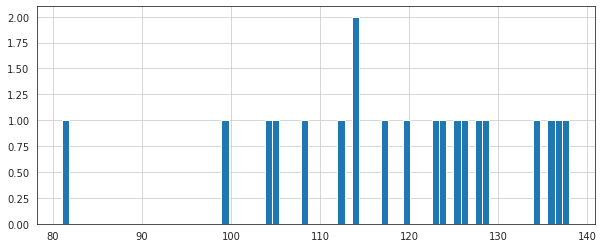

In [ ]:
plt.figure(figsize =(10, 4))
 
ratings['num of ratings'].hist(bins = 70)

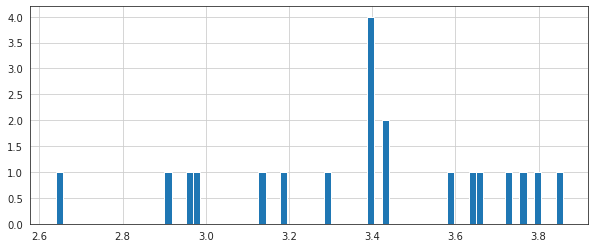

In [ ]:
plt.figure(figsize =(10, 4))
 
ratings['rating'].hist(bins = 70)

In [ ]:
moviemat = data.pivot_table(index ='user_id',
              columns ='title', values ='rating')
 
moviemat.head()
 
ratings.sort_values('num of ratings', ascending = False).head()

,rating,num of ratings
title,,
Solaris,3.797101,138
The Deer Hunter,3.423358,137
K-9,3.286765,136
Ace Ventura: When Nature Calls,3.656716,134
Blade: Trinity,2.976744,129


In [ ]:
Road_to_Perdition_user_ratings = moviemat['Road to Perdition']
Ray_user_ratings = moviemat['Ray']
 
Road_to_Perdition_user_ratings.head()

user_id
3321     5.0
16272    4.0
49890    5.0
57633    2.0
71594    NaN
Name: Road to Perdition, dtype: float64

In [ ]:
similar_to_Road_to_Perdition = moviemat.corrwith(Road_to_Perdition_user_ratings)
similar_to_Ray = moviemat.corrwith(Ray_user_ratings)
 
corr_Road_to_Perdition = pd.DataFrame(similar_to_Road_to_Perdition, columns =['Correlation'])
corr_Road_to_Perdition.dropna(inplace = True)
 
corr_Road_to_Perdition.head()

,Correlation
title,
10 Things I Hate About You,0.438983
A Love Song for Bobby Long,0.248276
Ace Ventura: When Nature Calls,0.158763
Blade: Trinity,0.344999
First Knight,0.411600


In [ ]:
corr_Road_to_Perdition.sort_values('Correlation', ascending = False).head(10)
corr_Road_to_Perdition = corr_Road_to_Perdition.join(ratings['num of ratings'])
 
corr_Road_to_Perdition.head()
 
corr_Road_to_Perdition[corr_Road_to_Perdition['num of ratings']>100].sort_values('Correlation', ascending = False).head()

,Correlation,num of ratings
title,,
Road to Perdition,1.000000,126
Guarding Tess,0.543074,114
Freaky Friday,0.526493,123
Wild Things,0.489201,108
10 Things I Hate About You,0.438983,105


In [ ]:
corr_Ray = pd.DataFrame(similar_to_Ray, columns =['Correlation'])
corr_Ray.dropna(inplace = True)
 
corr_Ray = corr_Ray.join(ratings['num of ratings'])
corr_Ray[corr_Ray['num of ratings']>100].sort_values('Correlation', ascending = False).head()

,Correlation,num of ratings
title,,
Ray,1.000000,112
Solaris,0.544762,138
10 Things I Hate About You,0.523321,105
Guarding Tess,0.477669,114
Wild Things,0.477053,108
